# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate

df = pd.read_csv("../data/data.csv") 

In [2]:
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# check for duplicates in Loan_ID
df[df.duplicated(subset=['Loan_ID'], keep=False)]
print(df.shape)

#no duplicates, so drop loan ID
df = df.drop(columns="Loan_ID")

(614, 13)


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [5]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

In [6]:
applicant_mean = df['ApplicantIncome'] .mean()
coapplicant_mean = df['CoapplicantIncome'] .mean()
applicant_median = df['ApplicantIncome'] .median()
coapplicant_median = df['CoapplicantIncome'] .median()

In [7]:
table = [["Applicant Income", applicant_mean, applicant_median],
         ["Coapplicant Income", coapplicant_mean, coapplicant_median]]

print (tabulate (table, 
                 headers=["", "Mean", "Median"], 
                 tablefmt="fancy_grid"))

╒════════════════════╤═════════╤══════════╕
│                    │    Mean │   Median │
╞════════════════════╪═════════╪══════════╡
│ Applicant Income   │ 5403.46 │   3812.5 │
├────────────────────┼─────────┼──────────┤
│ Coapplicant Income │ 1621.25 │   1188.5 │
╘════════════════════╧═════════╧══════════╛


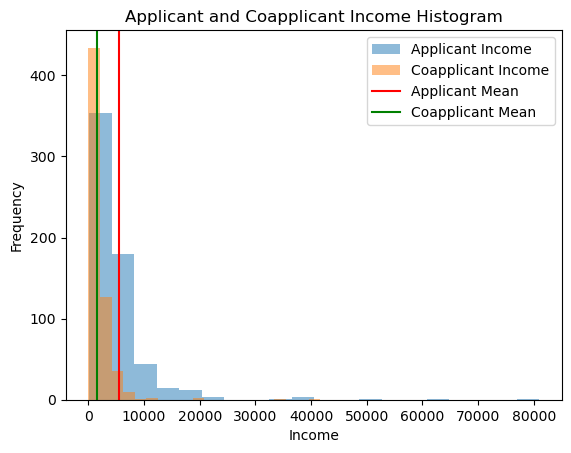

In [8]:
# histogram of both incomes
plt.hist(df['ApplicantIncome'], bins=20, alpha=0.5, label='Applicant Income')
plt.hist(df['CoapplicantIncome'], bins=20, alpha=0.5, label='Coapplicant Income')

# add vertical lines at the mean values
plt.axvline(applicant_mean, color='red', label='Applicant Mean')
plt.axvline(coapplicant_mean, color='green', label='Coapplicant Mean')

# set the title and axis labels
plt.title('Applicant and Coapplicant Income Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')

# add the legend
plt.legend()

# show the plot
plt.show()

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

In [9]:
print("Applicant difference: " + str(round(applicant_mean - applicant_median, 2)) )
print("Co-Applicant difference: " + str(round(coapplicant_mean - coapplicant_median, 2)) )

Applicant difference: 1590.96
Co-Applicant difference: 432.75


In [10]:
# applicant mean and co-applicant mean are both higher than their respective medians
# co-applicant difference is less, suggesting less skewedness in co-applicant income than in applicant income

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [11]:
print(df.Education.nunique())
print(df.Gender.nunique())
print(df.Married.nunique())
print(df.Self_Employed.nunique())
print(df.Credit_History.nunique())
print(df.Property_Area.nunique())
print(df.Dependents.nunique())

2
2
2
2
2
3
4


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [12]:
# Define the columns to count
columns_to_count = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Dependents']

# Create an empty list to hold the value counts
value_counts = []

# Loop over the columns and append the value counts to the list
for col in columns_to_count:
    value_counts.append([col, df[col].value_counts().to_dict()])

# Print the table
print(tabulate(value_counts, 
               headers=['Column', 'Value Counts'], 
               tablefmt="fancy_grid"))

╒════════════════╤════════════════════════════════════════════════╕
│ Column         │ Value Counts                                   │
╞════════════════╪════════════════════════════════════════════════╡
│ Gender         │ {'Male': 489, 'Female': 112}                   │
├────────────────┼────────────────────────────────────────────────┤
│ Married        │ {'Yes': 398, 'No': 213}                        │
├────────────────┼────────────────────────────────────────────────┤
│ Education      │ {'Graduate': 480, 'Not Graduate': 134}         │
├────────────────┼────────────────────────────────────────────────┤
│ Self_Employed  │ {'No': 500, 'Yes': 82}                         │
├────────────────┼────────────────────────────────────────────────┤
│ Credit_History │ {1.0: 475, 0.0: 89}                            │
├────────────────┼────────────────────────────────────────────────┤
│ Property_Area  │ {'Semiurban': 233, 'Urban': 202, 'Rural': 179} │
├────────────────┼──────────────────────────────

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

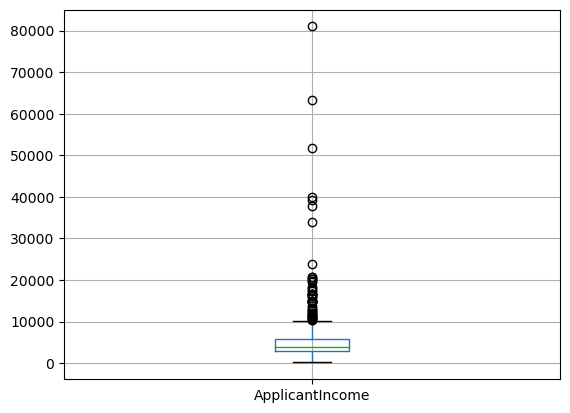

In [13]:
df.boxplot(column='ApplicantIncome')

# Set the title and axis labels

# Show the plot
plt.show()

Look at the distribution of income segregated  by `Education`

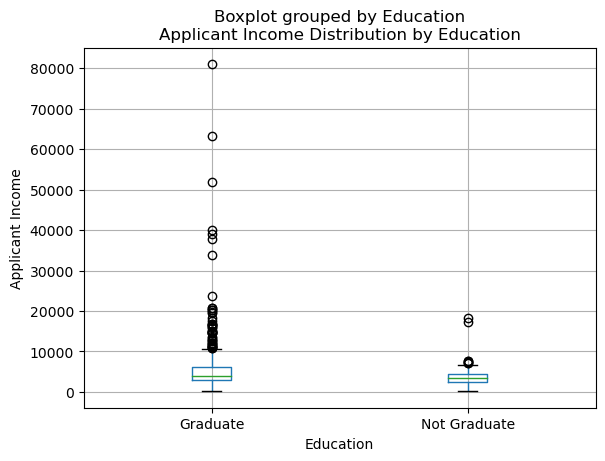

In [14]:
# Create a box plot of the ApplicantIncome variable
# Grouped by the Education variable
df.boxplot(column='ApplicantIncome', by='Education')

# Set the title and axis labels
plt.title('Applicant Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')

# Show the plot
plt.show()

Look at the histogram and boxplot of LoanAmount

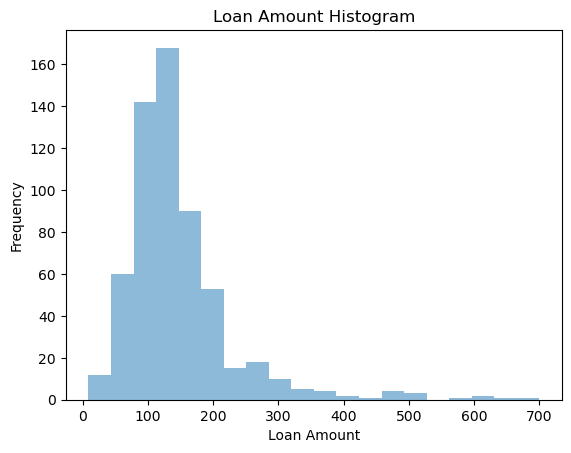

In [15]:
# histogram of loan amount
plt.hist(df['LoanAmount'], bins=20, alpha=0.5, label='LoanAmount')

# set the title and axis labels
plt.title('Loan Amount Histogram')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# show the plot
plt.show()

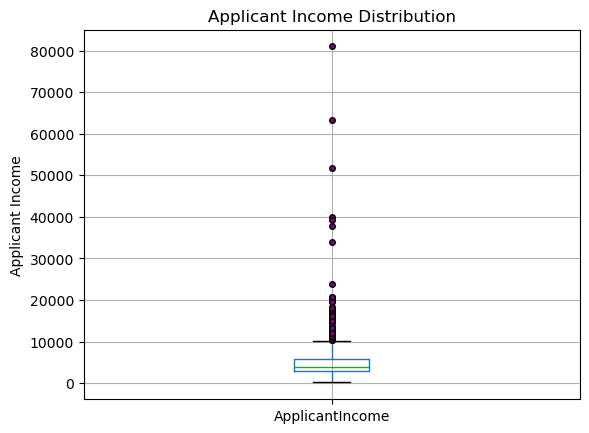

In [16]:
fig, ax = plt.subplots()
df.boxplot(column='ApplicantIncome', flierprops=dict(markerfacecolor='purple', markersize=4), ax=ax)

# Set the title and axis labels
plt.title('Applicant Income Distribution')
plt.ylabel('Applicant Income')

# Show the plot
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [17]:
# Create the pivot table
pivot = df.pivot_table(index='Credit_History', columns='Loan_Status', values='ApplicantIncome', aggfunc='count')

# Convert the pivot table to a list of lists
pivot_list = pivot.reset_index().values.tolist()
pivot_list.insert(0, ['Credit History', 'Loan Status Y', 'Loan Status N'])

# Print the table using tabulate
print(tabulate(pivot_list, headers='firstrow', tablefmt="fancy_grid"))

╒══════════════════╤═════════════════╤═════════════════╕
│   Credit History │   Loan Status Y │   Loan Status N │
╞══════════════════╪═════════════════╪═════════════════╡
│                0 │              82 │               7 │
├──────────────────┼─────────────────┼─────────────────┤
│                1 │              97 │             378 │
╘══════════════════╧═════════════════╧═════════════════╛


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [18]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# 22 of 614 in LoanAmount. Drop em (too important to impute)
df = df.dropna(subset=['LoanAmount'])

In [20]:
# 14 NaNs in Loan_Amount_Term. Fill with median
median_term = df.Loan_Amount_Term.median()
print (median_term)
df.Loan_Amount_Term = df['Loan_Amount_Term'].fillna(median_term)

360.0


In [21]:
# 2 missing values for married. Fill with mode
# # mode returns a series. To assign no.1 to a variable, use index[0]
mode_married = df.Married.mode()[0]
print(mode_married)

# Fill null values in Married with the mode
df.Married = df.Married.fillna(mode_married)

Yes


In [22]:
# 13 missing values for gender. Fill with mode
# mode returns a series. To assign no.1 to a variable, use index[0]
mode_gender = df.Gender.mode()[0] 
print(mode_gender)

df.Gender = df.Gender.fillna(mode_gender)

Male


In [23]:
# 13 missing values for dependents. Fill with 0
# nb must be as a string, because all the other 0s are strings
df.Dependents = df.Dependents.fillna('0')

In [24]:
# 31 missing values for self-employed. Fill with mode
mode_employed = df.Self_Employed.mode()[0] 
print(mode_employed)
df.Self_Employed = df.Self_Employed.fillna(mode_employed)

No


In [25]:
# 50 NaNs in CreditHistory. Not sure whether to drop them or make them 0
df.Credit_History.value_counts()

1.0    458
0.0     85
Name: Credit_History, dtype: int64

In [26]:
# If 0 contained more values, I'd make them 0, but I will drop them
df = df.dropna(subset=['Credit_History'])

In [27]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Encoding of Categorical Variables

In [28]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
print(df.Education.value_counts())
print(df.Married.value_counts())

Graduate        429
Not Graduate    114
Name: Education, dtype: int64
Yes    350
No     193
Name: Married, dtype: int64


In [30]:
# the following columns only have 2 possible values:
    # Education, Gender, Married, Self_Employed, Credit_History
# label encoding, instead of one-hot encoding, will ensure that a ton of extra columns aren't created

# import label encoding
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
le = LabelEncoder()

In [31]:
# default for label encoder is most common value is assigned to 0, less common to 1
# unless, I guess, the values are already 0 and 1 as in credit history
# or yes and no, as in self-employed

# I want to reverse this for education, so grduate = 1 and not-graduate = 0
# Fit and transform the Education column, reversing the encoding
df['Education'] = le.fit_transform(df['Education'])
df['Education'] = 1 - df['Education']

In [32]:
# select other columns to encode using default
cols_to_encode = ['Education', 'Married', 'Gender','Self_Employed', 'Credit_History', 'Loan_Status']

# apply LabelEncoder to selected columns
df[cols_to_encode] = df[cols_to_encode].apply(LabelEncoder().fit_transform)

In [33]:
# One-hot encode the 'Property_Area' and 'Dependents' columns
df_encoded = pd.get_dummies(df[['Property_Area', 'Dependents']])

# Concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Property_Area' and 'Dependents' columns
df.drop(columns=['Property_Area', 'Dependents'], inplace=True)

In [34]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

In [35]:
df.dtypes

Gender                       int32
Married                      int32
Education                    int64
Self_Employed                int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History               int64
Loan_Status                  int32
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
dtype: object

### Extreme values

Remove Outliers

In [36]:
# Applicant and co-applicant outliers
print (df [df['ApplicantIncome'] > 20000] .shape[0])
print (df [df['CoapplicantIncome'] > 20000] .shape[0])

#drop the 9 outliers
df = df [df['ApplicantIncome'] <= 20000]

# do the same for co-applicant income
df = df [df['CoapplicantIncome'] <= 20000]

9
1


In [37]:
# Loan Amount outliers
print (df [df['LoanAmount'] > 300] .shape[0])

#drop the 19 outliers
df = df [df['LoanAmount'] <= 300]

19


Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [38]:
# Apply log transformation to LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

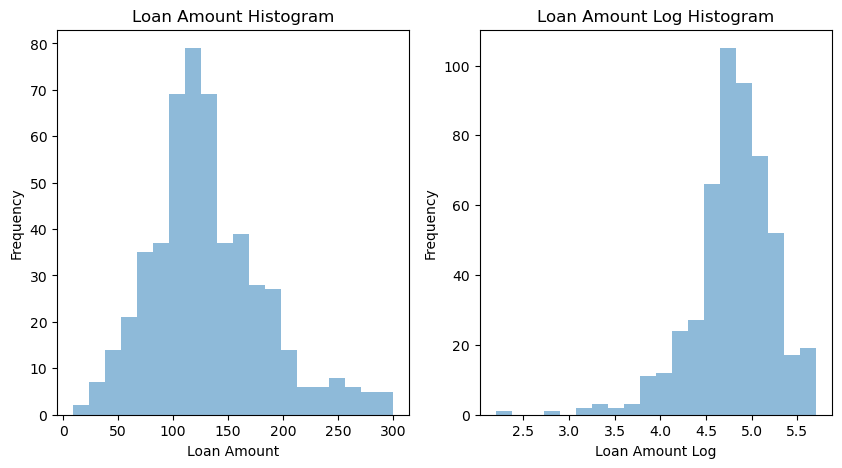

In [39]:
# Create a figure and set the size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram of LoanAmount on the first subplot
axs[0].hist(df['LoanAmount'], bins=20, alpha=0.5)
axs[0].set_title('Loan Amount Histogram')
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Frequency')

# Plot the histogram of LoanAmount_log on the second subplot
axs[1].hist(df['LoanAmount_log'], bins=20, alpha=0.5)
axs[1].set_title('Loan Amount Log Histogram')
axs[1].set_xlabel('Loan Amount Log')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.show()

In [40]:
# because I removed the outliers, the data actually looks more evenly distributed before the log transform
# since there were only 19 outliers in a dataset of >600, I will use the non-logged column for my model

Log transform for applicant and co-applicant income

In [41]:
# First, need to change all 0s to 0.1
df['ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x: 0.1 if x == 0 else x)
df['CoapplicantIncome'] = df['CoapplicantIncome'].apply(lambda x: 0.1 if x == 0 else x)

In [42]:
# Apply log transformation to LoanAmount
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'])

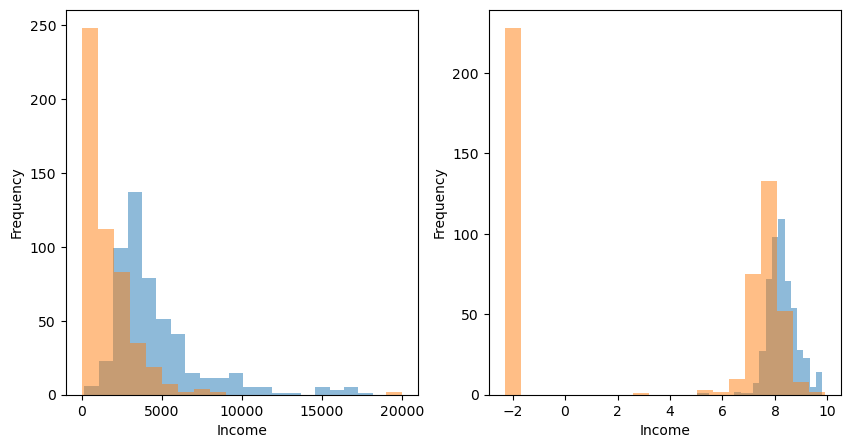

In [43]:
# histogram before and after transform

# Create a figure and set the size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot first histogram
axs[0].hist(df['ApplicantIncome'], bins=20, alpha=0.5, label='Applicant Income')
axs[0].hist(df['CoapplicantIncome'], bins=20, alpha=0.5, label='Co-Applicant Income')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Frequency')

# Plot second histogram
axs[1].hist(df['ApplicantIncome_log'], bins=20, alpha=0.5, label='Log of Applicant Income')
axs[1].hist(df['CoapplicantIncome_log'], bins=20, alpha=0.5, label='Log of Co-Applicant Income')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Frequency')


# add the legend and show the plot
plt.show()

In [44]:
# Because of the issues with so many co the co-applicant incomes being 0, I will use the combined income

Combine both incomes as total income and take a log transformation of the same.

In [45]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df['TotalIncome_log'] = np.log(df['TotalIncome'])

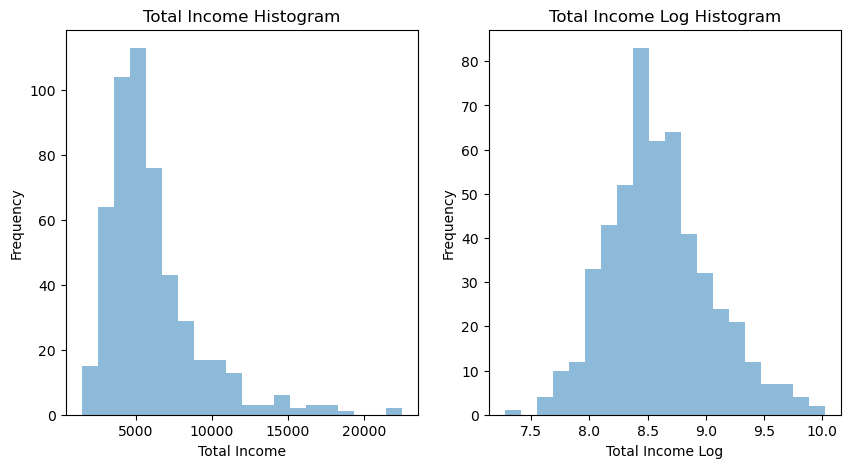

In [46]:
# Create a figure and set the size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram of LoanAmount on the first subplot
axs[0].hist(df['TotalIncome'], bins=20, alpha=0.5)
axs[0].set_title('Total Income Histogram')
axs[0].set_xlabel('Total Income')
axs[0].set_ylabel('Frequency')

# Plot the histogram of LoanAmount_log on the second subplot
axs[1].hist(df['TotalIncome_log'], bins=20, alpha=0.5)
axs[1].set_title('Total Income Log Histogram')
axs[1].set_xlabel('Total Income Log')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.show()

In [47]:
# Unlike LoanAmount, despite removing outliers, the TotalIncome looks more normally distributed
# when using log transform, so I will use this column instead

In [48]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'LoanAmount_log', 'ApplicantIncome_log',
       'CoapplicantIncome_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [49]:
cols_to_inc =   ['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount', \
                'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural', \
                'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0', \
                'Dependents_1', 'Dependents_2', 'Dependents_3+', 'TotalIncome_log']

## 4. Building a Predictive Model

Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df[cols_to_inc]
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale using Standard Scaler

In [51]:
# Import and create an instance of the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the data
scaler.fit(X_train)

StandardScaler()

In [52]:
# Transform X_train data using model fitted on X-train data
X_train_scaled = scaler.transform(X_train)

# Transform X_test data using scaler model fitted on X-train data
X_test_scaled = scaler.transform(X_test)

XG Boost without scaling

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier

# Fit the model
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)


In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# Calculate accuracy, precision and recall
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("XGBoost Unscaled Accuracy: {:.3f}".format(acc))
print("Precision:", precision)
print("Recall:", recall)

XGBoost Unscaled Accuracy: 0.825
Precision: 0.8717948717948718
Recall: 0.8947368421052632


XG Boost with scaling

In [55]:
# Fit the model
xgb_model2 = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_model2.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred2 = xgb_model2.predict(X_test_scaled)

# Calculate accuracy, precision and recall
acc2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)

# Print results
print("XGBoost Scaled Accuracy: {:.3f}".format(acc2))
print("Precision:", precision2)
print("Recall:", recall2)

XGBoost Scaled Accuracy: 0.825
Precision: 0.8717948717948718
Recall: 0.8947368421052632


In [56]:
# XG Boost appears to work exactly the same way with and without scaling

Confusion Matrix

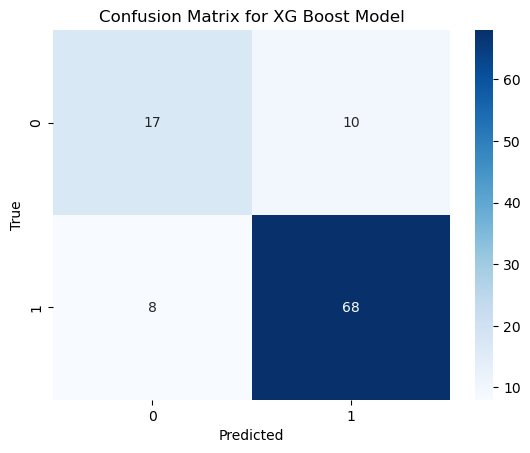

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confused = confusion_matrix(y_test, y_pred)

# plot matrix
sns.heatmap(confused, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XG Boost Model')
plt.show()

Gaussian Naive Bayes using unscaled data

In [58]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = gnb.predict(X_test)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8505747126436781
Recall: 0.9736842105263158


Gaussian Naive Bayes using scaled data

In [59]:
# Create an instance of the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train_scaled, y_train)

# Predict the class labels for the test data
y_pred = gnb.predict(X_test_scaled)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8505747126436781
Recall: 0.9736842105263158


Logistic Regression on unscaled data

In [60]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8426966292134831
Recall: 0.9868421052631579


Logistic Regression on scaled data

In [61]:
# Create an instance of the LogisticRegression class
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8426966292134831
Recall: 0.9868421052631579


Logistic Regression using min-max scaler

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Fit the MinMaxScaler to the data
scaler.fit(X_train)

# Transform the data
X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

In [63]:
# Create an instance of the LogisticRegression class
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train_minmax_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_minmax_scaled)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8426966292134831
Recall: 0.9868421052631579


Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
# try with entropy

# initialize the classifier
rf1 = RandomForestClassifier(n_estimators=100, 
                            criterion='entropy', 
                            max_features=int(np.sqrt(df.shape[1])) )

# fit the classifier to the training data
rf1.fit(X_train, y_train)

# predict the target variable for the test data
y_pred1 = rf1.predict(X_test)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8426966292134831
Recall: 0.9868421052631579


In [66]:
# try with gini

# initialize the classifier
rf2 = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features=int(np.sqrt(df.shape[1])) )

# fit the classifier to the training data
rf2.fit(X_train, y_train)

# predict the target variable for the test data
y_pred2 = rf2.predict(X_test)

# Calculate the accuracy, precision and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.854
Precision: 0.8426966292134831
Recall: 0.9868421052631579


Try paramater grid search to improve the results

In [67]:
"""

"""

'\n\n'

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python